### Set up environment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [5]:
def calculate_ccdf_wetvalues(precipitation_data, bins_i_want, filter_small_vals=False):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]

    # Compute the cumulative distribution function (CDF) using the histogram
    # np.diff(bin_edges): Calculate the differences between bin edges to get bin widths
    # hist * np.diff(bin_edges): Multiply each histogram value by its corresponding bin width
    # np.cumsum(): Compute the cumulative sum of the products
    # cdf: The cumulative distribution function values
    hist, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    
    # Calculate 1 - CDF for CCDF
    ccdf = 1 - cdf
    
    # Find the centre point of each bin for plotting
    bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    
    return cdf, ccdf, bin_centres, bin_edges[1:]


# Function to calculate PDF from a single file
def calculate_pdf_wetvalues (precipitation_data,bins_i_want, filter_small_vals=False ):
    # Remove NAN values
    precipitation_data = precipitation_data[~np.isnan(precipitation_data)]
    # Keep only wet values 
    precipitation_data = precipitation_data[precipitation_data >= 0.1]
    
    freqs, bin_edges = np.histogram(precipitation_data, bins=bins_i_want, density=True)
    # I think this was just for knowing how many value was in each bin
    # How was I using that in log_discrete_histogram_less_legend???
    # freqs_numbers, bin_edges = np.histogram(precipitation_data, bins= bins, density=False)
    
    # Find the centre point of each bin for plotting
    bin_centres =  0.5*(bin_edges[1:] + bin_edges[:-1])    
    
    return freqs, bin_centres

def get_summer_vals(compressed, repeated_times):
    months = np.array([dt.month for dt in repeated_times]) 
    df = pd.DataFrame({
        'datetime': repeated_times,
        'value': compressed,
        'month': months})

    # Step 3: Filter for summer months (June, July, August)
    summer_df = df[df['month'].isin([6, 7, 8])]

    # Step 4: Extract summer data
    summer_times = summer_df['datetime'].values  # Summer datetimes
    summer_values = summer_df['value'].values   # Summer values

    # Output results
    print(len(summer_values))
    return summer_values

In [3]:
resolution = '12km'

### Get observations data for overlapping and not overlapping time periods

In [67]:
obs_data_overlap = np.array([])
obs_data_no_overlap = np.array([])

datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_12km/'

for yr in range(2006,2019):
    print(yr)
    file_name = datadir + f"compressed_{yr}_filtered_100.npy"
    this_yr = np.load(file_name)
    times = np.load(datadir + f"timevalues_{yr}_filtered_100.npy", allow_pickle=True)
    jja = get_summer_vals(this_yr, times)
    obs_data_no_overlap =np.append(obs_data_no_overlap, jja)
    if yr >=2006 and yr <=2020:
         obs_data_overlap =np.append(obs_data_overlap, jja)

2006


FileNotFoundError: [Errno 2] No such file or directory: '/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/NIMROD/30mins/NIMROD_regridded_12km/compressed_2006_unfiltered.npy'

### Get model data for overlapping and not overlapping time periods

In [6]:
import iris
import glob as glob
import pandas as pd
import numpy as np
em='bc005'
yr=2005
datadir = f"/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_every30mins/2.2km_bng_regridded_12km_masked/2002_2020/{em}_wholeyear/"
### Get a list of filenames for this ensemble member
monthly_cubes_list = iris.load('/nfs/a319/gy17m2a/PhD/datadir/UKCP18_every30mins/2.2km_bng_regridded_12km_masked/2002_2020/bc005/bng_bc005a.pr200508.nc')
model_cube = monthly_cubes_list.concatenate_cube() 

# Assuming `model_cube` is your Iris cube
time_coord = model_cube.coord('time')  # Extract the time coordinate
time_points = time_coord.points       # Get the numerical time points

# Convert numerical time points to datetime objects
datetimes = time_coord.units.num2date(time_points)

repeated_times = np.tile(datetimes, 2528)

file_name = datadir + f"{yr}_compressed.npy"
this_yr = np.load(file_name)
jja = get_summer_vals(this_yr, repeated_times)

ValueError: All arrays must be of the same length

In [9]:
112*82

9184

In [10]:
ems =  ['bc005','bc007', 'bc009',  'bc010', 
       'bc011', 'bc013',  'bc015',  'bc016',  'bc017', 'bc018', 'bc012', 'bc006']
model_data_overlap = np.array([])
model_data_no_overlap = np.array([])
for em in ems:
    datadir = f"/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_every30mins/2.2km_bng_regridded_12km_masked/2002_2020/{em}_wholeyear/"
    for yr in range(2001, 2020):
        print(em, yr)
        file_name = datadir + f"compressed_{yr}.npy"
        this_yr = np.load(file_name)
        jja = get_summer_vals(this_yr, repeated_times)
        model_data_no_overlap =np.append(model_data_no_overlap, jja)
        if yr >=2006 and yr <=2020:
            model_data_overlap =np.append(model_data_overlap, jja)

bc005 2001


FileNotFoundError: [Errno 2] No such file or directory: '/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_every30mins/2.2km_bng_regridded_12km_masked/2002_2020/bc005_wholeyear/compressed_2001.npy'

In [19]:
np.save('/nfs/a319/gy17m2a/PhD/datadir/model_data_overlap_jja.npy', model_data_overlap)
np.save('/nfs/a319/gy17m2a/PhD/datadir/model_data_no_overlap_jja.npy', model_data_no_overlap)

In [55]:
np.save('/nfs/a319/gy17m2a/PhD/datadir/obs_data_overlap_jja.npy', obs_data_overlap)
np.save('/nfs/a319/gy17m2a/PhD/datadir/obs_data_no_overlap_jja.npy', obs_data_no_overlap)

In [20]:
# model_data_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/model_data_overlap.npy')
# model_data_no_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/model_data_no_overlap.npy')
# obs_data_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/obs_data_overlap.npy')
# obs_data_no_overlap = np.load('/nfs/a319/gy17m2a/PhD/datadir/obs_data_no_overlap.npy')

## Calculate CDFs and CCDFs

In [43]:
bins_i_want =  [0, 0.1, 2, 3, 7, 10,15, 21, 35,50,  max(np.nanmax(obs_data_overlap), np.nanmax(model_data_overlap))]
# bins_i_want = np.logspace(np.log10(0.09), np.log10(100), 21)
low_bins_i_want = [0.1,  0.95, 1.05, 1.15,2]
# low_bin_num = len(bins_i_want)-1

In [8]:
# # An alternative is to use a logarithmmic spacing (see lower down)
# number_many_linear_bins=20 # Number of bins for improved plots with equal bins
# power_for_unequal_bins=3.0 # Power used for generating unequal bins
# number_unequal_bins=12 # Number of unequal bins 
# unequal_min=0.1 # Must be zero or bigger for this approach to work
# unequal_max=1.01*np.nanmax(obs_data_no_overlap) # Ensure this is greater than the largest number
# # N-th root (e.g. third root) of bin edges for manual bin edge spacing
# unequal_linspace=np.linspace(unequal_min,unequal_max**(1.0/power_for_unequal_bins),number_unequal_bins) 
# bins_i_want=unequal_linspace**power_for_unequal_bins
# bins_i_want

### Overlapping years 
#### CDF and CCDF

In [58]:
obs_overlap_cdf, obs_overlap_ccdf, obs_overlap_bin_centres, obs_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
model_overlap_cdf, model_overlap_ccdf, model_overlap_bin_centres, model_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap,bins_i_want)

#### CDF - low values

In [45]:
obs_overlap_cdf_low, obs_overlap_ccdf_low, obs_overlap_bin_centres_low,  obs_overlap_bin_edges_low  = calculate_ccdf_wetvalues(obs_data_overlap, low_bins_i_want)
model_overlap_cdf_low, model_overlap_ccdf_low, model_overlap_bin_centres_low, model_overlap_bin_edges_low = calculate_ccdf_wetvalues(model_data_overlap,low_bins_i_want)

#### PDF

In [46]:
obs_overlap_pdf, obs_overlap_bin_centres_pdf = calculate_pdf_wetvalues(obs_data_overlap, bins_i_want)
model_overlap_pdf, model_overlap_bin_centres_pdf = calculate_pdf_wetvalues(model_data_overlap,bins_i_want)

### Not overlapping years 
#### CCDF and CDF

In [64]:
obs_no_overlap_cdf, obs_no_overlap_ccdf, obs_no_overlap_bin_centres, obs_no_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
model_no_overlap_cdf, model_no_overlap_ccdf, model_no_overlap_bin_centres, model_no_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap, bins_i_want)

#### CDF - low values

In [65]:
obs_no_overlap_cdf_low, obs_no_overlap_ccdf_low, obs_no_overlap_bin_centres_low,  obs_no_overlap_bin_edges_low  = calculate_ccdf_wetvalues(obs_data_no_overlap, low_bins_i_want)
model_no_overlap_cdf_low, model_no_overlap_ccdf_low, model_no_overlap_bin_centres_low, model_no_overlap_bin_edges_low = calculate_ccdf_wetvalues(model_data_no_overlap,low_bins_i_want)

#### PDF

In [59]:
obs_no_overlap_pdf, obs_no_overlap_bin_centres_pdf = calculate_pdf_wetvalues(obs_data_no_overlap, bins_i_want)
model_no_overlap_pdf, model_no_overlap_bin_centres_pdf = calculate_pdf_wetvalues(model_data_no_overlap,bins_i_want)

### Plot

In [48]:
# Create patches
patches= []
patch1 = mpatches.Patch(color= 'black', label='NIMROD')
patch2 = mpatches.Patch(color= 'darkorange', label='UKCP18')
patches.append(patch1)
patches.append(patch2)

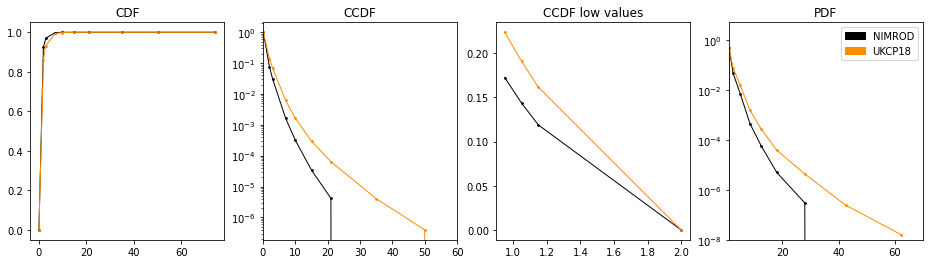

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_overlap_bin_edges, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_overlap_bin_edges,obs_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_overlap_bin_edges, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_overlap_bin_edges,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')
# axs[0].set_ylim(0, None) 

axs[1].scatter(obs_overlap_bin_edges, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_overlap_bin_edges,obs_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_overlap_bin_edges, model_overlap_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(model_overlap_bin_edges,model_overlap_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,60)
# axs[1].set_ylim(0,1)
axs[1].set_title('CCDF')

axs[2].scatter(obs_overlap_bin_edges_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_overlap_bin_edges_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_overlap_bin_edges_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'darkorange')
axs[2].plot(model_overlap_bin_edges_low,model_overlap_ccdf_low ,linewidth = 1, color = 'darkorange')
# axs[2].set_xlim(1,1.10)
# axs[2].set_ylim(0.1,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'darkorange')
axs[3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'darkorange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

### Not overlapping data

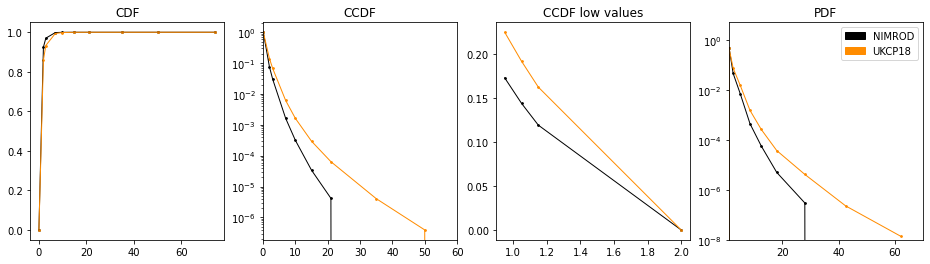

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
axs[0].scatter(obs_no_overlap_bin_edges, obs_no_overlap_cdf ,linewidth = 1,s=3, color = 'black')
axs[0].plot(obs_no_overlap_bin_edges,obs_no_overlap_cdf ,linewidth = 1, color = 'black')
axs[0].scatter(model_no_overlap_bin_edges, model_no_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
axs[0].plot(model_no_overlap_bin_edges,model_no_overlap_cdf ,linewidth = 1, color = 'darkorange')
axs[0].set_title('CDF')
# axs[0].set_ylim(0, None) 

axs[1].scatter(obs_no_overlap_bin_edges, obs_no_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
axs[1].plot(obs_no_overlap_bin_edges,obs_no_overlap_ccdf ,linewidth = 1, color = 'black')
axs[1].scatter(model_no_overlap_bin_edges, model_no_overlap_ccdf ,linewidth = 1,s=3, color = 'darkorange')
axs[1].plot(model_no_overlap_bin_edges,model_no_overlap_ccdf ,linewidth = 1, color = 'darkorange')
axs[1].set_yscale('log')
axs[1].set_xlim(0,60)
# axs[1].set_ylim(0,1)
axs[1].set_title('CCDF')

axs[2].scatter(obs_no_overlap_bin_edges_low, obs_no_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
axs[2].plot(obs_no_overlap_bin_edges_low,obs_no_overlap_ccdf_low ,linewidth = 1, color = 'black')
axs[2].scatter(model_no_overlap_bin_edges_low, model_no_overlap_ccdf_low ,linewidth = 1,s=3, color = 'darkorange')
axs[2].plot(model_no_overlap_bin_edges_low,model_no_overlap_ccdf_low ,linewidth = 1, color = 'darkorange')
# axs[2].set_xlim(1,1.10)
# axs[2].set_ylim(0.1,0.35)
axs[2].set_title('CCDF low values')

axs[3].scatter(obs_no_overlap_bin_centres_pdf, obs_no_overlap_pdf ,linewidth = 1,s=3, color = 'black')
axs[3].plot(obs_no_overlap_bin_centres_pdf,obs_no_overlap_pdf ,linewidth = 1, color = 'black')
axs[3].scatter(model_no_overlap_bin_centres_pdf, model_no_overlap_pdf ,linewidth = 1,s=3, color = 'darkorange')
axs[3].plot(model_no_overlap_bin_centres_pdf,model_no_overlap_pdf ,linewidth = 1, color = 'darkorange')
axs[3].set_title('PDF')
axs[3].set_yscale('log')
axs[3].set_xlim(0.95,70)
axs[3].set_ylim(1e-8,5)
axs[3].legend(handles=patches);

### Plot for each ensemble member separately

01


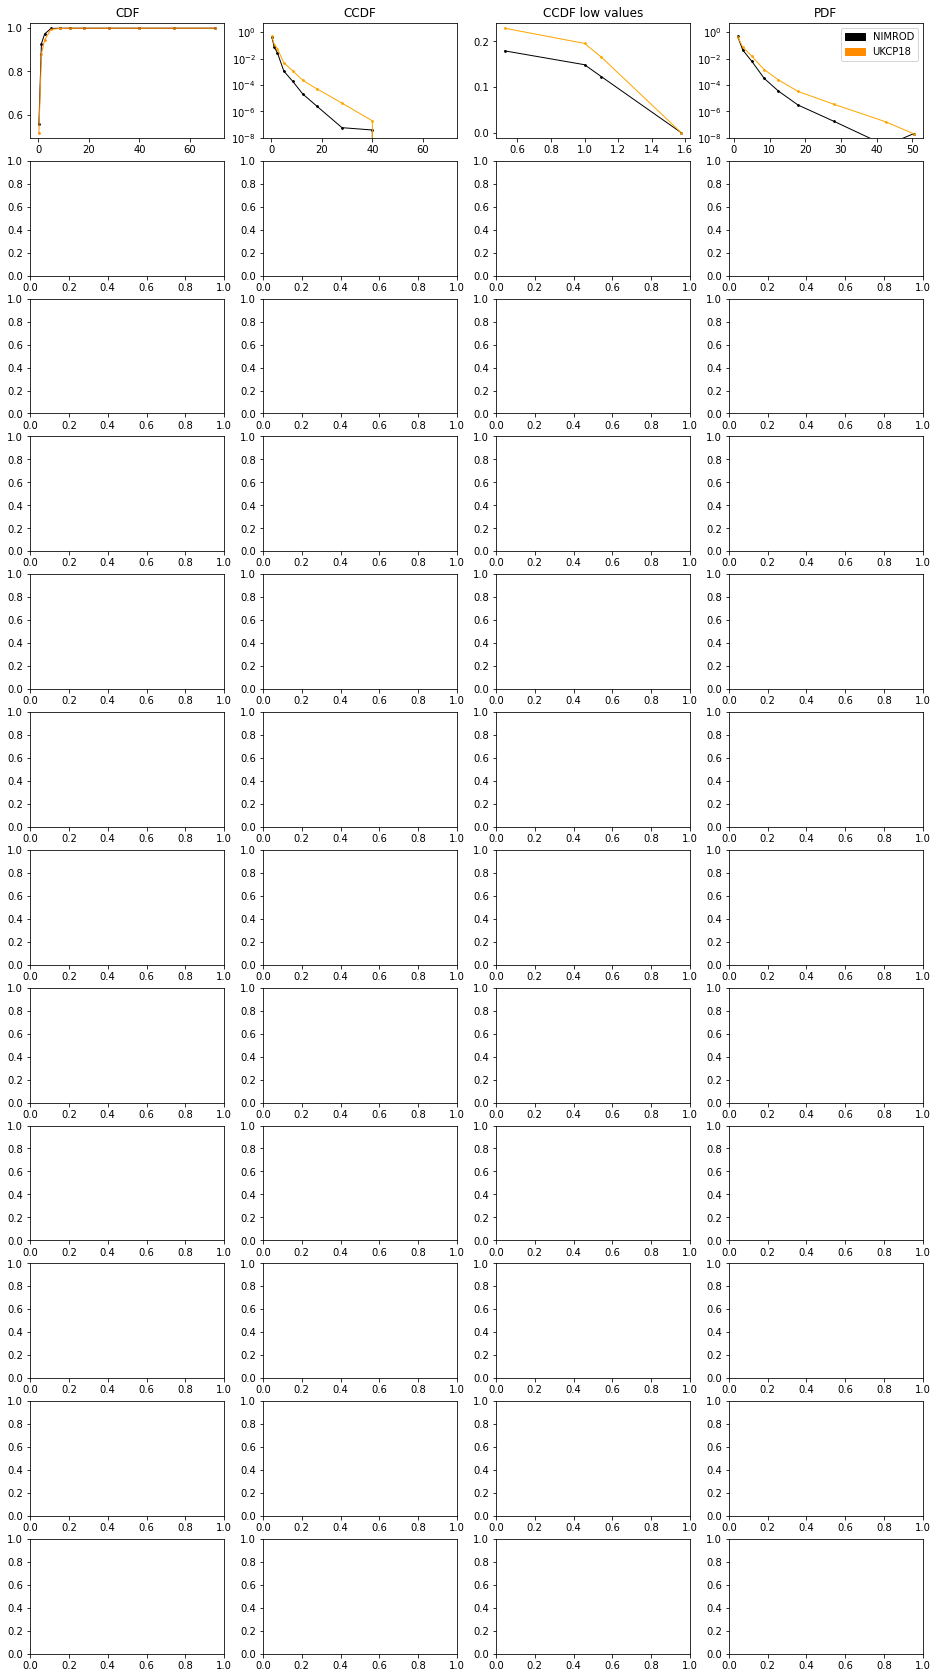

In [72]:
ems = ['01',]

fig, axs = plt.subplots(nrows=12, ncols=4, figsize=(16,30))
for ax_num, em in enumerate(ems):
    model_data_overlap = np.array([])
    model_data_no_overlap = np.array([])
    
    print(em)
    datadir = f'/nfs/a319/gy17m2a/PhD/ProcessedData/TimeSeries/UKCP18_hourly/2.2km_regridded_12km/AreaWeighted/1980_2001/{em}/'
    for yr in range(1981,2001):
        file_name = datadir + f"compressed_{yr}.npy"
        this_yr = np.load(file_name)
        model_data_no_overlap =np.append(model_data_no_overlap, this_yr)
        if yr >=1990 and yr <=2001:
            model_data_overlap =np.append(model_data_overlap, this_yr)
    bins_i_want =  [0, 0.5,2, 3, 7, 10,15, 21, 35,45, 62, 78]
    
    obs_overlap_cdf, obs_overlap_ccdf, obs_overlap_bin_centres, obs_overlap_bin_edges = calculate_ccdf_wetvalues(obs_data_overlap, bins_i_want)
    model_overlap_cdf, model_overlap_ccdf, model_overlap_bin_centres, model_overlap_bin_edges = calculate_ccdf_wetvalues(model_data_overlap,bins_i_want)
    
    axs[ax_num, 0].scatter(obs_overlap_bin_centres, obs_overlap_cdf ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 0].plot(obs_overlap_bin_centres,obs_overlap_cdf ,linewidth = 1, color = 'black')
    axs[ax_num, 0].scatter(model_overlap_bin_centres, model_overlap_cdf ,linewidth = 1,s=3, color = 'darkorange')
    axs[ax_num, 0].plot(model_overlap_bin_centres,model_overlap_cdf ,linewidth = 1, color = 'darkorange')
    axs[ax_num, 0].set_title('CDF')

    axs[ax_num, 1].scatter(obs_overlap_bin_centres, obs_overlap_ccdf ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 1].plot(obs_overlap_bin_centres,obs_overlap_ccdf ,linewidth = 1, color = 'black')
    axs[ax_num, 1].scatter(model_overlap_bin_centres, model_overlap_ccdf ,linewidth = 1,s=3, color = 'orange')
    axs[ax_num, 1].plot(model_overlap_bin_centres,model_overlap_ccdf ,linewidth = 1, color = 'orange')
    axs[ax_num, 1].set_yscale('log')
    axs[ax_num, 1].set_ylim(1e-8,5)
    axs[ax_num, 1].set_title('CCDF')

    axs[ax_num, 2].scatter(obs_overlap_bin_centres_low, obs_overlap_ccdf_low ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 2].plot(obs_overlap_bin_centres_low,obs_overlap_ccdf_low ,linewidth = 1, color = 'black')
    axs[ax_num, 2].scatter(model_overlap_bin_centres_low, model_overlap_ccdf_low ,linewidth = 1,s=3, color = 'orange')
    axs[ax_num, 2].plot(model_overlap_bin_centres_low,model_overlap_ccdf_low ,linewidth = 1, color = 'orange')
    axs[ax_num, 2].set_title('CCDF low values')

    axs[ax_num, 3].scatter(obs_overlap_bin_centres_pdf, obs_overlap_pdf ,linewidth = 1,s=3, color = 'black')
    axs[ax_num, 3].plot(obs_overlap_bin_centres_pdf,obs_overlap_pdf ,linewidth = 1, color = 'black')
    axs[ax_num, 3].scatter(model_overlap_bin_centres_pdf, model_overlap_pdf ,linewidth = 1,s=3, color = 'orange')
    axs[ax_num, 3].plot(model_overlap_bin_centres_pdf,model_overlap_pdf ,linewidth = 1, color = 'orange')
    axs[ax_num, 3].set_title('PDF')
    axs[ax_num, 3].set_yscale('log')
    axs[ax_num, 3].set_ylim(1e-8,5)
    axs[ax_num, 3].legend(handles=patches);
